In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('./combined.csv')

# Find the number of unique items in each column
unique_counts = df.nunique()

unique_items = df['Sensor'].unique()

# Display the results
print(unique_counts)
print(unique_items)

Unnamed: 0    268025
DateTime       17755
Sensor             9
Value              2
Timestamp      10697
dtype: int64
['bathroom_door' 'bathroom_button' 'bathroom_light' nan 'bedroom_light'
 'bedroom_button' 'kitchen_light' 'kitchen_motion' 'living_button'
 'living_light']


In [3]:
from datetime import datetime

def convert_to_seconds(date_str):
    date_obj = datetime.strptime(date_str, '%m/%d/%Y %H:%M:%S')
    return int(date_obj.timestamp())

df['seconds_since_epoch'] = df['Timestamp'].apply(convert_to_seconds)
print(df.head())

   Unnamed: 0 DateTime           Sensor  Value            Timestamp  \
0           0  36:22.9    bathroom_door    0.0  12/20/2022 17:36:23   
1           1  36:24.2    bathroom_door    0.0  12/20/2022 17:36:24   
2           2  36:24.2  bathroom_button    0.0  12/20/2022 17:36:24   
3           3  36:24.2    bathroom_door    0.0  12/20/2022 17:36:24   
4           4  36:24.6   bathroom_light    1.0  12/20/2022 17:36:25   

   seconds_since_epoch  
0           1671579383  
1           1671579384  
2           1671579384  
3           1671579384  
4           1671579385  


In [28]:
# Sample the data on different time frames and get sum of the active sensors on that data

df['date'] = pd.to_datetime(df['Timestamp']) #convert the Timestamp to datetime
df = df.set_index('date') #make the date column as index
df_hourly = df.Value.resample('h').sum() #resample on hourly basis and get summary of sensor values on that hour.

#resample on 15 minutes basis and get summary of sensor values on that time frame.
df_minute = df.Value.resample('15min').sum()

#resample on 15 minutes basis and get summary of sensor values on that time frame.
df_2hours = df.Value.resample('2h').sum()

#resample on 15 minutes basis and get summary of sensor values on that time frame.
df_6hours = df.Value.resample('6h').sum()

# df_hourly.columns = ['date', 'values']
df_hourly = df_hourly.reset_index()
df_minute = df_minute.reset_index()
df_2hours = df_2hours.reset_index()
df_6hours = df_6hours.reset_index()

# new_df = pd.DataFrame(df_hourly, columns=['datetime', 'values'])
print(df_hourly.columns, df_minute.shape, df_2hours.shape)

Index(['date', 'Value'], dtype='object') (2586, 2) (324, 2)


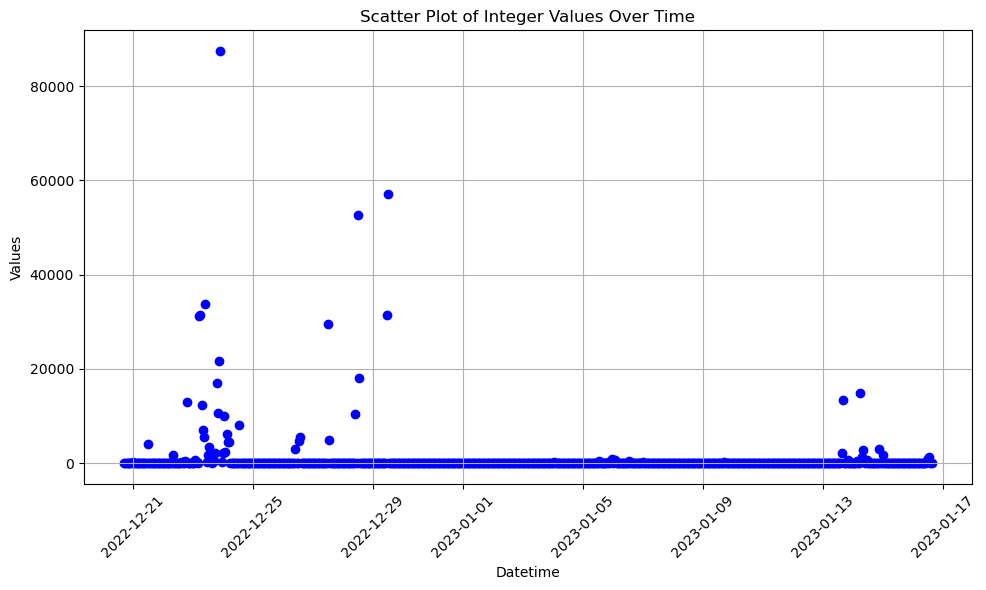

In [23]:

# df_hourly['datetime'] = pd.to_datetime(df_hourly['date'])
plt.figure(figsize=(10, 6))
plt.scatter(df_hourly['date'], df_hourly['Value'], color='blue', marker='o')

# Formatting the plot
plt.title('Scatter Plot of Integer Values Over Time')
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.grid(True)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

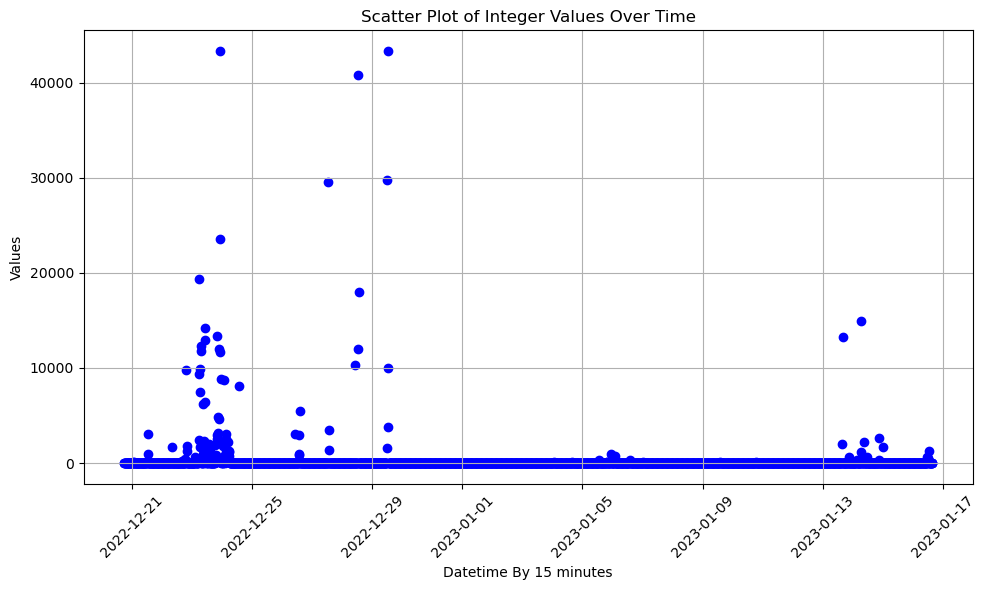

In [5]:
# df_hourly['datetime'] = pd.to_datetime(df_hourly['date'])
plt.figure(figsize=(10, 6))
plt.scatter(df_minute['date'], df_minute['Value'], color='blue', marker='o')

# Formatting the plot
plt.title('Scatter Plot of Integer Values Over Time')
plt.xlabel('Datetime By 15 minutes')
plt.ylabel('Values')
plt.grid(True)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

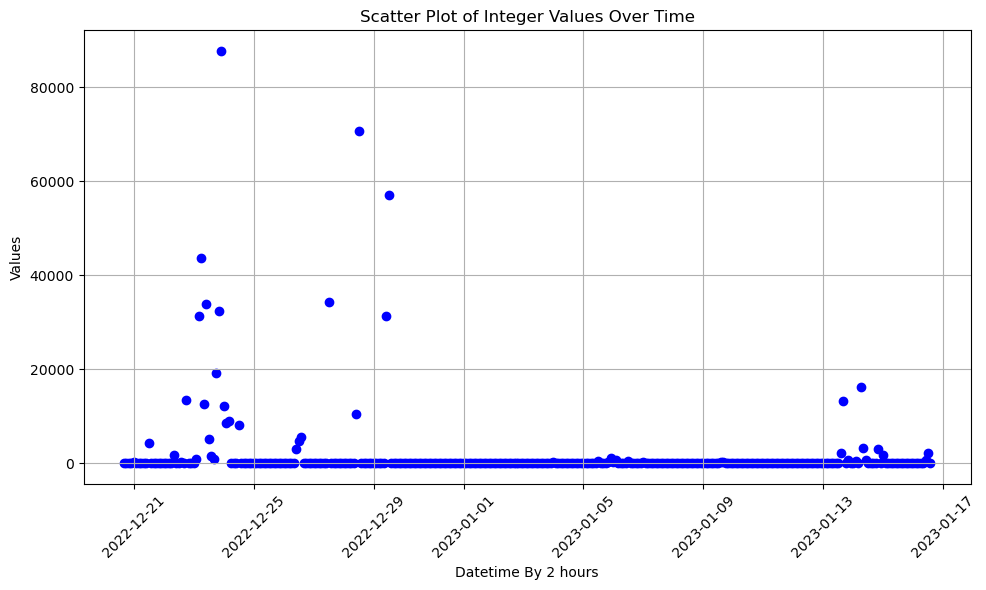

In [15]:
# df_hourly['datetime'] = pd.to_datetime(df_hourly['date'])
plt.figure(figsize=(10, 6))
plt.scatter(df_2hours['date'], df_2hours['Value'], color='blue', marker='o')

# Formatting the plot
plt.title('Scatter Plot of Integer Values Over Time')
plt.xlabel('Datetime By 2 hours')
plt.ylabel('Values')
plt.grid(True)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

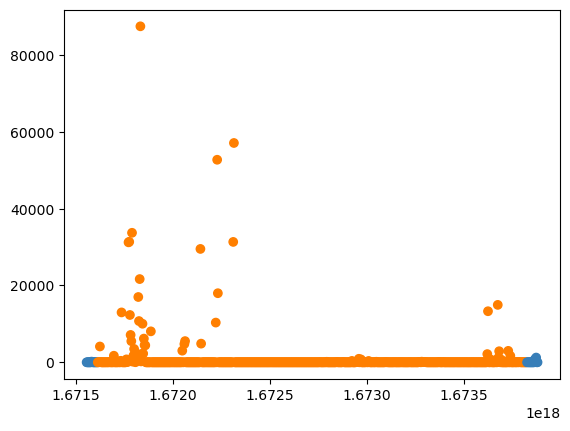

In [24]:
# Fit the model 
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

df_hourly['date'] = df_hourly['date'].values.astype("float64")
df_hourly['Value'] = df_hourly['Value'].values.astype("float64")

clf = LocalOutlierFactor(n_neighbors=30, contamination=0.05) 
y_pred = clf.fit_predict(df_hourly) 
# Generate colors based on the prediction
colors = np.array(['#377eb8', '#ff7f00']) 
plt.scatter(df_hourly['date'], df_hourly['Value'], color=colors[(y_pred + 1) // 2])

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


{0: 66, 1: 68, 2: 58, 3: 69, 4: 62, 5: 67, 6: 63, 7: 69, 8: 59, 9: 66}


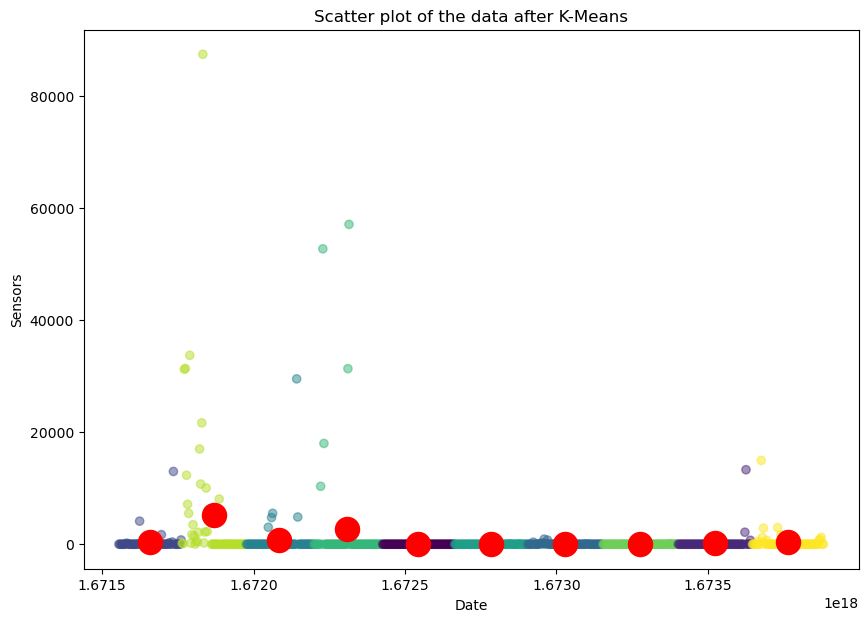

[1.02600003e+14 9.90000035e+13 9.54000008e+13 9.18000036e+13
 8.82000028e+13 8.46000047e+13 8.10000024e+13 7.73999954e+13
 7.37999950e+13 7.01999979e+13]


In [42]:
# k means clustering

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(df_hourly)

# Predict the cluster labels: labels
labels = kmeans.predict(df_hourly)
# print(labels)

unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))

plt.figure(figsize=(10,7))
plt.scatter(df_hourly['date'], df_hourly['Value'], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red')
plt.title('Scatter plot of the data after K-Means')
plt.xlabel('Date')
plt.ylabel('Sensors')
plt.show()

# Compute the distances to the cluster centers
distances = kmeans.transform(df_hourly)

# Compute the anomaly score (distance to the closest centroid)
scores = distances.min(axis=1)

# Print the first 10 anomaly scores
print(scores[:10])



C:\Users\ASUS\AppData\Local\Temp\ipykernel_19628\4051798993.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Reds")


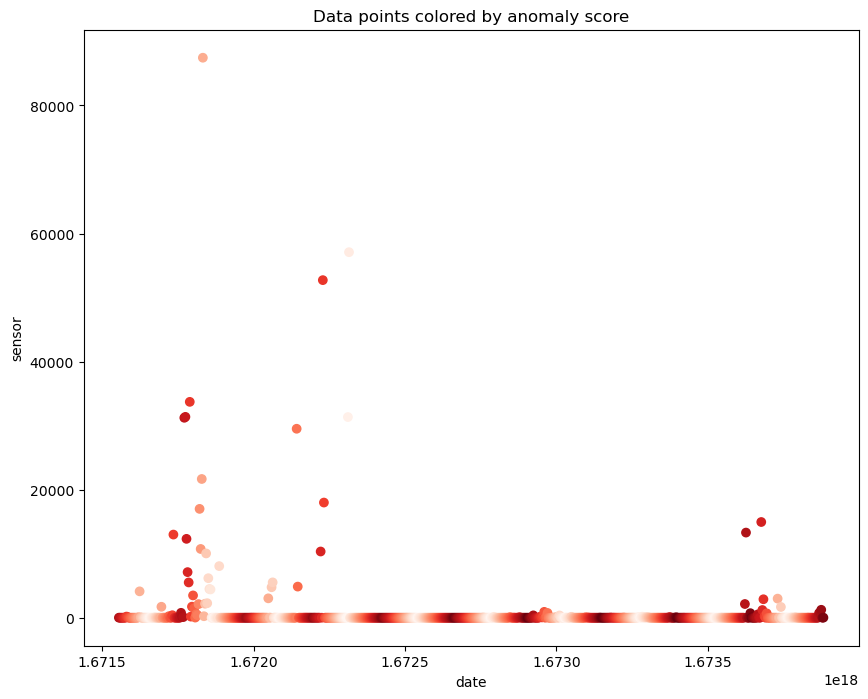

In [39]:
#Define the color map to convert scores to colors

import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Create a color map that maps scores to colors
cmap = cm.get_cmap("Reds")

# Normalize the scores to the range [0, 1] for color mapping
normalized_scores = (scores-min(scores)) / (max(scores)-min(scores))

# Create a scatter plot of the PCA-transformed data with points colored by anomaly score
plt.figure(figsize=(10, 8))
plt.scatter(df_hourly['date'], df_hourly['Value'], c=cmap(normalized_scores))
# plt.colorbar(label='Anomaly score')
plt.xlabel('date')
plt.ylabel('sensor')
plt.title('Data points colored by anomaly score')
plt.show()

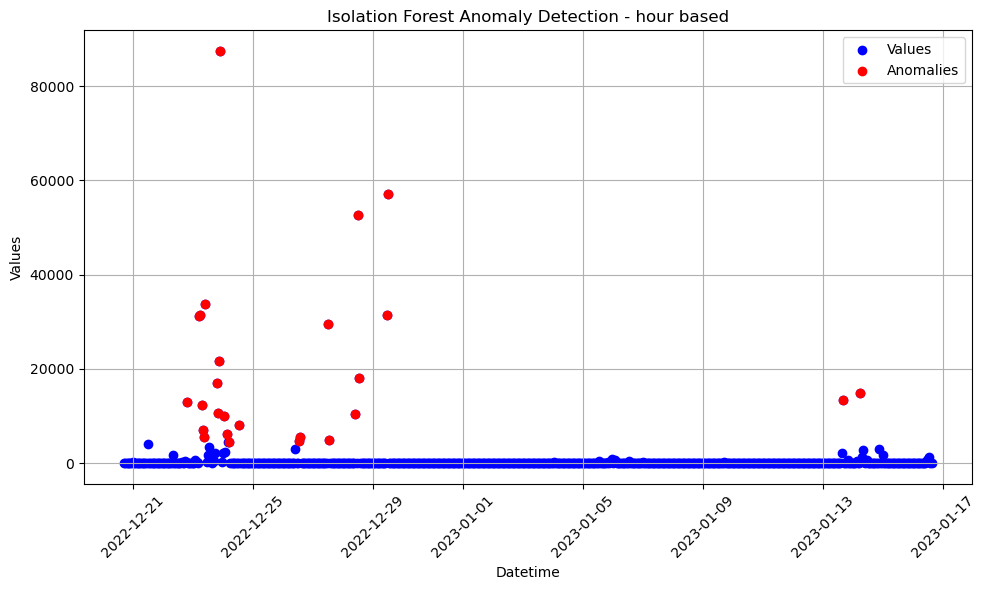

Total anomalies: 26, Percentage of anomalous values: 4.01854714064915%


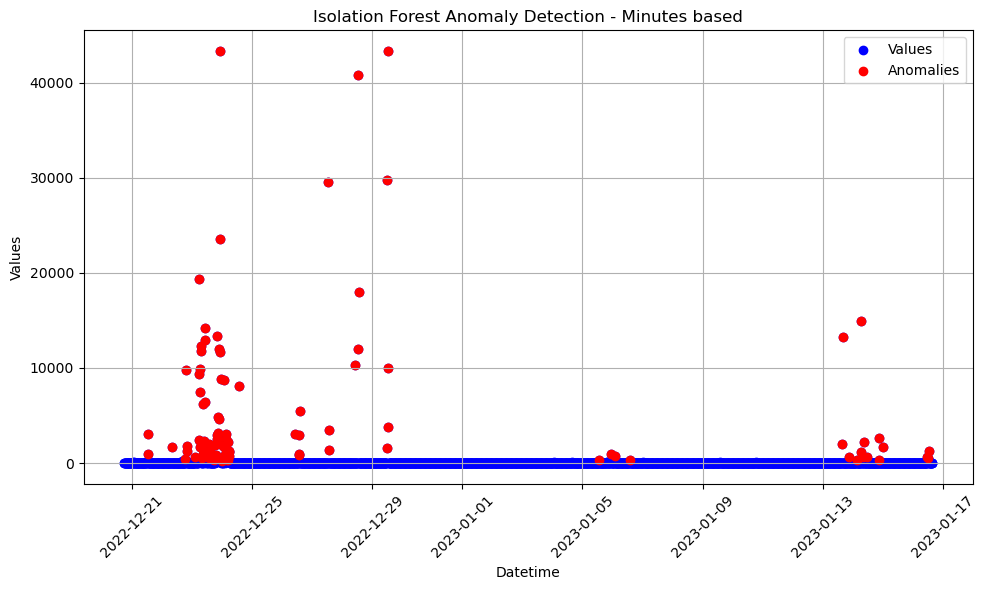

                    date   Value  anomaly
76   2022-12-21 12:30:00  3085.0       -1
77   2022-12-21 12:45:00   933.0       -1
154  2022-12-22 08:00:00  1703.0       -1
196  2022-12-22 18:30:00   388.0       -1
198  2022-12-22 19:00:00  9781.0       -1
...                  ...     ...      ...
2415 2023-01-14 21:15:00  2603.0       -1
2427 2023-01-15 00:15:00  1679.0       -1
2567 2023-01-16 11:15:00   654.0       -1
2570 2023-01-16 12:00:00   581.0       -1
2574 2023-01-16 13:00:00  1235.0       -1

[104 rows x 3 columns]
Total anomalies: 104, Percentage of anomalous values: 4.021655065738592%


In [25]:
# isolation forest
from sklearn.ensemble import IsolationForest

df_hourly['date'] = pd.to_datetime(df_hourly['date'])

# Prepare data for IsolationForest
values = df_hourly[['Value']]  # Selecting the 'values' column as input for the model

# Initialize and fit the IsolationForest model
model = IsolationForest(contamination=0.04, random_state=42)
df_hourly['anomaly'] = model.fit_predict(values)

# Isolation Forest outputs:
# -1 for anomalies
#  1 for normal data points

# Filter the anomalies
anomalies = df_hourly[df_hourly['anomaly'] == -1]
# print(df)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(df_hourly['date'], df_hourly['Value'], label='Values', color='blue')
plt.scatter(anomalies['date'], anomalies['Value'], color='red', label='Anomalies', marker='o')
plt.title('Isolation Forest Anomaly Detection - hour based')
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the anomalies detected
# print(anomalies)
# Calculate the percentage of values equal to -1
count_anomaly_h = (df_hourly['anomaly'] == -1).sum()

# Calculate the percentage of values equal to -1
percentage_h = (count_anomaly_h / len(df_hourly)) * 100
print(f"Total anomalies: {count_anomaly_h}, Percentage of anomalous values: {percentage_h}%")

# anomalies by minutes
df_minute['date'] = pd.to_datetime(df_minute['date'])

# Prepare data for IsolationForest
values_m = df_minute[['Value']]  # Selecting the 'values' column as input for the model

df_minute['anomaly'] = model.fit_predict(values_m)

# Isolation Forest outputs:
# -1 for anomalies
#  1 for normal data points

# Filter the anomalies
anomalies_m = df_minute[df_minute['anomaly'] == -1]
# print(df)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(df_minute['date'], df_minute['Value'], label='Values', color='blue')
plt.scatter(anomalies_m['date'], anomalies_m['Value'], color='red', label='Anomalies', marker='o')
plt.title('Isolation Forest Anomaly Detection - Minutes based')
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the anomalies detected
print(anomalies_m)
# Calculate the percentage of values equal to -1
count_anomaly_m = (df_minute['anomaly'] == -1).sum()

# Calculate the percentage of values equal to -1
percentage_m = (count_anomaly_m / len(df_minute)) * 100
print(f"Total anomalies: {count_anomaly_m}, Percentage of anomalous values: {percentage_m}%")


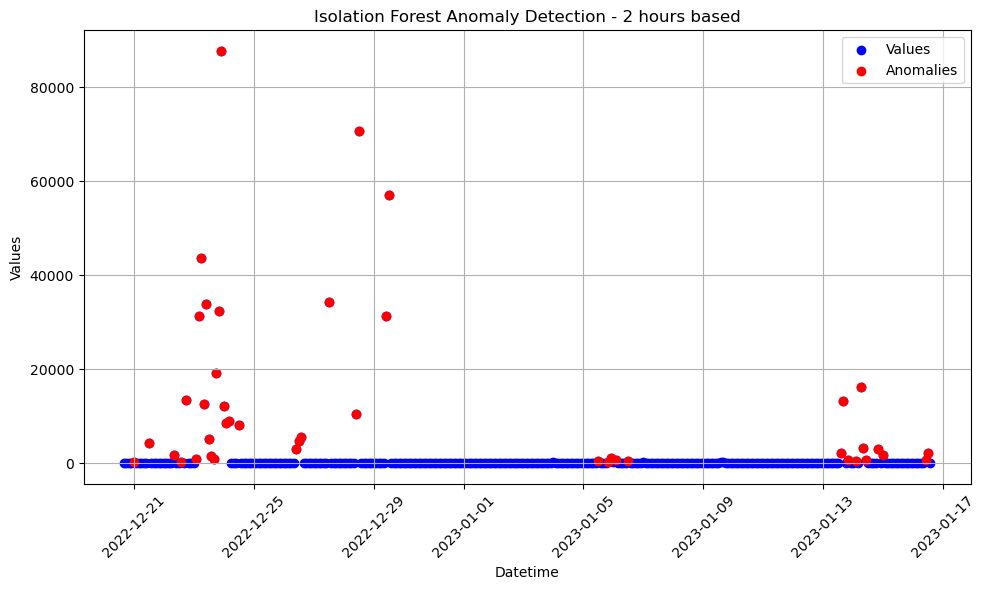

                   date    Value  anomaly
4   2022-12-21 00:00:00    280.0       -1
10  2022-12-21 12:00:00   4178.0       -1
20  2022-12-22 08:00:00   1718.0       -1
23  2022-12-22 14:00:00    254.0       -1
25  2022-12-22 18:00:00  13377.0       -1
29  2022-12-23 02:00:00    933.0       -1
30  2022-12-23 04:00:00  31322.0       -1
31  2022-12-23 06:00:00  43687.0       -1
32  2022-12-23 08:00:00  12633.0       -1
33  2022-12-23 10:00:00  33890.0       -1
34  2022-12-23 12:00:00   5209.0       -1
35  2022-12-23 14:00:00   1500.0       -1
36  2022-12-23 16:00:00    948.0       -1
37  2022-12-23 18:00:00  19121.0       -1
38  2022-12-23 20:00:00  32405.0       -1
39  2022-12-23 22:00:00  87690.0       -1
40  2022-12-24 00:00:00  12226.0       -1
41  2022-12-24 02:00:00   8441.0       -1
42  2022-12-24 04:00:00   8902.0       -1
46  2022-12-24 12:00:00   8062.0       -1
69  2022-12-26 10:00:00   3036.0       -1
70  2022-12-26 12:00:00   4770.0       -1
71  2022-12-26 14:00:00   5526.0  

In [27]:
# anomalies by 2 hours
model = IsolationForest(contamination='auto', random_state=42)
df_2hours['date'] = pd.to_datetime(df_2hours['date'])

# Prepare data for IsolationForest
values_2h = df_2hours[['Value']]  # Selecting the 'values' column as input for the model

df_2hours['anomaly'] = model.fit_predict(values_2h)

# Isolation Forest outputs:
# -1 for anomalies
#  1 for normal data points

# Filter the anomalies
anomalies_2h = df_2hours[df_2hours['anomaly'] == -1]
# print(df)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(df_2hours['date'], df_2hours['Value'], label='Values', color='blue')
plt.scatter(anomalies_2h['date'], anomalies_2h['Value'], color='red', label='Anomalies', marker='o')
plt.title('Isolation Forest Anomaly Detection - 2 hours based')
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the anomalies detected
print(anomalies_2h)
# Calculate the percentage of values equal to -1
count_anomaly_2h = (df_2hours['anomaly'] == -1).sum()

# Calculate the percentage of values equal to -1
percentage_2h = (count_anomaly_2h / len(df_2hours)) * 100
print(f"Total anomalies: {count_anomaly_2h}, Percentage of anomalous values: {percentage_2h}%")

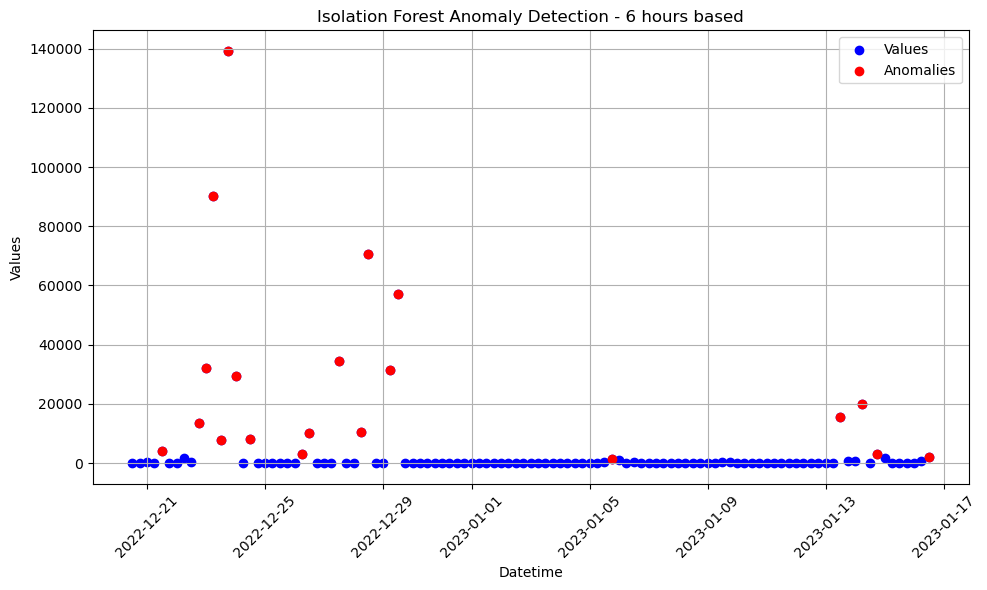

                   date     Value  anomaly
4   2022-12-21 12:00:00    4178.0       -1
9   2022-12-22 18:00:00   13396.0       -1
10  2022-12-23 00:00:00   32266.0       -1
11  2022-12-23 06:00:00   90210.0       -1
12  2022-12-23 12:00:00    7657.0       -1
13  2022-12-23 18:00:00  139216.0       -1
14  2022-12-24 00:00:00   29569.0       -1
16  2022-12-24 12:00:00    8063.0       -1
23  2022-12-26 06:00:00    3049.0       -1
24  2022-12-26 12:00:00   10302.0       -1
28  2022-12-27 12:00:00   34376.0       -1
31  2022-12-28 06:00:00   10355.0       -1
32  2022-12-28 12:00:00   70715.0       -1
35  2022-12-29 06:00:00   31338.0       -1
36  2022-12-29 12:00:00   57087.0       -1
65  2023-01-05 18:00:00    1433.0       -1
96  2023-01-13 12:00:00   15449.0       -1
99  2023-01-14 06:00:00   19954.0       -1
101 2023-01-14 18:00:00    2997.0       -1
108 2023-01-16 12:00:00    2093.0       -1
Total anomalies: 20, Percentage of anomalous values: 18.34862385321101%


In [29]:
# anomalies by 2 hours
model = IsolationForest(contamination='auto', random_state=42)
df_6hours['date'] = pd.to_datetime(df_6hours['date'])

# Prepare data for IsolationForest
values_6h = df_6hours[['Value']]  # Selecting the 'values' column as input for the model

df_6hours['anomaly'] = model.fit_predict(values_6h)

# Isolation Forest outputs:
# -1 for anomalies
#  1 for normal data points

# Filter the anomalies
anomalies_6h = df_6hours[df_6hours['anomaly'] == -1]
# print(df)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(df_6hours['date'], df_6hours['Value'], label='Values', color='blue')
plt.scatter(anomalies_6h['date'], anomalies_6h['Value'], color='red', label='Anomalies', marker='o')
plt.title('Isolation Forest Anomaly Detection - 6 hours based')
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the anomalies detected
print(anomalies_6h)
# Calculate the percentage of values equal to -1
count_anomaly_6h = (df_6hours['anomaly'] == -1).sum()

# Calculate the percentage of values equal to -1
percentage_6h = (count_anomaly_6h / len(df_6hours)) * 100
print(f"Total anomalies: {count_anomaly_6h}, Percentage of anomalous values: {percentage_6h}%")